#  Results and Analysis

In [1]:
from sklearn.dummy import DummyClassifier
import pandas as pd
from scipy import sparse
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Besides standard performance metrics, how can we judge if the model is learning or merely having luck with random guessing?

## Establish baseline

In [2]:
# Get training data, which the model was also trained on
X_train = sparse.load_npz('../../PyCharmProjects/Case_Study_NLP/data/X_train_csr_mat.npz')
y_train = pd.read_csv('../../PyCharmProjects/Case_Study_NLP/data/y_train.csv')

In [3]:
# Get untransformed test data
test_data = pd.read_csv('../../PyCharmProjects/Case_Study_NLP/data/test_data.csv')
X_test = test_data.Text
y_test = test_data.Product

# Load fitted transformer
tf1 = pickle.load(open('../../PyCharmProjects/Case_Study_NLP/data/tfidf.pkl', 'rb'))

# Apply to test data
X_tf1 = tf1.transform(X_test)

In [4]:
# Train dummy classifier to make predictions based on the class frequency
new_dummy_classifier = DummyClassifier(strategy="stratified")
new_dummy_classifier.fit(X_train,y_train.Product)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [5]:
# Make predictions on transformed test data
pred = new_dummy_classifier.predict(X_tf1.todense())

In [6]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.16797754883497656
[[ 430  472  969 1232  994   88  331  323]
 [ 593  725 1241 1581 1247  132  435  454]
 [ 859 1168 2013 2565 2128  197  682  726]
 [1256 1473 2479 3264 2611  285  912  907]
 [ 997 1256 2070 2742 2145  209  687  767]
 [ 114  113  226  263  232   21   72   71]
 [ 353  413  722  903  744   74  248  271]
 [ 369  397  741  881  710   68  259  252]]
              precision    recall  f1-score   support

           0       0.09      0.09      0.09      4839
           1       0.12      0.11      0.12      6408
           2       0.19      0.19      0.19     10338
           3       0.24      0.25      0.25     13187
           4       0.20      0.20      0.20     10873
           5       0.02      0.02      0.02      1112
           6       0.07      0.07      0.07      3728
           7       0.07      0.07      0.07      3677

   micro avg       0.17      0.17      0.17     54162
   macro avg       0.12      0.12      0.12     54162
weighted avg       0.17      0.17      

### This is the baseline zero model, or the output of random guessing based on frequency of targets

## Compare to model's performance

### Test predictions

In [7]:
results = pd.read_csv('../../PyCharmProjects/Case_Study_NLP/data/results_half_h128_product.csv')

In [8]:
print(accuracy_score(results['True'], results['Pred']))
print(confusion_matrix(results['True'], results['Pred']))
print(classification_report(results['True'], results['Pred']))

0.8250987777408515
[[ 3580   516   108   121   241   108   146    19]
 [  377  4950   338   350    97    39   230    27]
 [   56   317  8923   674   136     1   173    58]
 [  106   420   872 10733   262    14   547   233]
 [  129    71   141   169 10146     6   167    44]
 [  255   119    35    55    21   583    28    16]
 [  106   168   192   475   175    18  2523    71]
 [   16    27    82   177    53     2    69  3251]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4839
           1       0.75      0.77      0.76      6408
           2       0.83      0.86      0.85     10338
           3       0.84      0.81      0.83     13187
           4       0.91      0.93      0.92     10873
           5       0.76      0.52      0.62      1112
           6       0.65      0.68      0.66      3728
           7       0.87      0.88      0.88      3677

   micro avg       0.83      0.83      0.83     54162
   macro avg       0.80      0

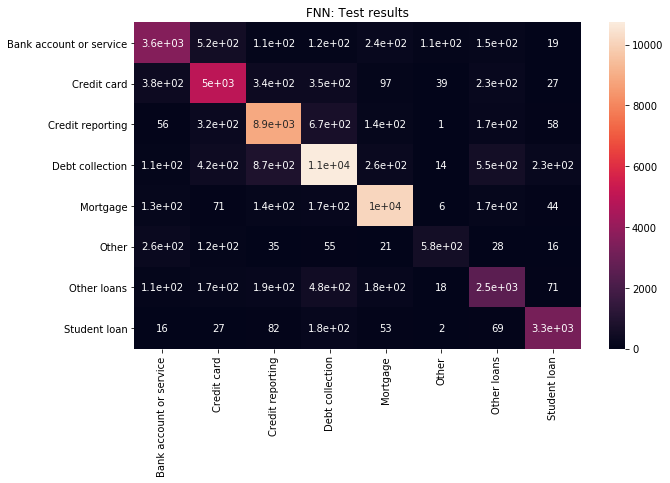

In [9]:
k = open('../../PyCharmProjects/Case_Study_NLP/data/product_encoder.pkl', 'rb')
le = pickle.load(k)

cm = confusion_matrix(y_pred=results['Pred'], y_true=results['True'])
df_cm = pd.DataFrame(cm, index = [i for i in le.classes_],
                  columns = [i for i in le.classes_])
plt.figure(figsize = (10,6))
plt.title('FNN: Test results')
sns.heatmap(df_cm, annot=True);

k.close()

It appears that the category 'Other' might be too general. <br/>
The intuitive grouping of target labels might be less than ideal; but 'Other loans' still performs well.<br/>
This could be examined with a new consolidation of features, retraining, evaluating.

### Training errors

In [10]:
train_errors = pd.read_csv('../../PycharmProjects/Case_Study_NLP/train_errors/loss_hist_h128_half_product.csv').drop(['Unnamed: 0'], axis=1)


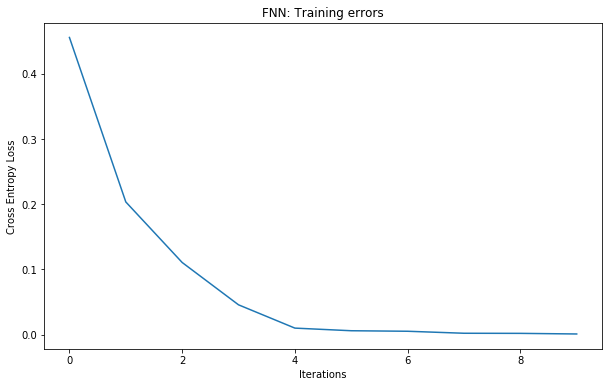

In [11]:
ax = train_errors.plot(legend=False, title='FNN: Training errors', figsize=(10,6))
ax.set_xlabel('Iterations')
ax.set_ylabel('Cross Entropy Loss');